## Localy Weighted regression
1) Read and Normalise the Dataset

2) Generate W for every query point!

3) No training is involved, directly make predictions using closed form solution we dervied!

(X′WX)inv * X′WY where X' is X_Transpose

4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]



##### Locally weighted regression can be used for any number_featured dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# data frames of single feature
dfx=pd.read_csv('locally_weighted_x.csv')
dfy=pd.read_csv("locally_weighted_y.csv")


In [12]:
X=dfx.values
Y=dfy.values
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [13]:
# Normalization of data
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

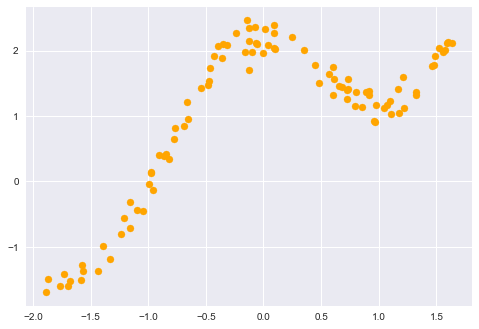

In [14]:
plt.style.use("seaborn")
plt.scatter(X,Y,color="orange")
plt.show()

## Find out W(MxM) diagonal atrix/nd array -> M=X.shape[0]

In [15]:

#print(type(np.mat(np.eye(5))))

#a*b ==> a,b -->matrices -->Matrix Multicplication
#a*b ==>? a,b -->arrays --->Element Wise

In [62]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.eye(M)# diagonal matrix
    for i in range(M):
        xi=X[i]
        x=query_point
        vect=xi-x
        W[i,i]=np.exp(-1*(np.dot(vect,vect.T)/(2*tau*tau)))#no need to do transpose an vector's transpose have same shape 
        # as of vector itself
        # but if it's not a vector then we'l have to do -> **imp**
    return W

In [63]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [64]:
w=getW(2,X,5)
print(w.shape)
print(w)

(99, 99)
[[0.89483694 0.         0.         ... 0.         0.         0.        ]
 [0.         0.85316996 0.         ... 0.         0.         0.        ]
 [0.         0.         0.89505219 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.92398643 0.         0.        ]
 [0.         0.         0.         ... 0.         0.96182667 0.        ]
 [0.         0.         0.         ... 0.         0.         0.9879235 ]]


## Make Prediction

In [83]:
def predict_y(X,Y,query_pt,tau):
    # add dummy column of 1's in X
    m=X.shape[0]
    ones=np.ones((m,1))# a matrix
    print(ones.shape)
    X_=np.hstack((ones,X))
    X_=np.mat(X_)
    print(X_.shape)
    # dummy feature to query_pt also
    qx=np.mat([1,query_pt])
    # get W
    w=getW(qx,X_,tau)
    
    #theta=np.dot(np.linalg.pinv(np.dot(np.dot(X_.T,w),X)))
    # Note-> to avoid repeating dot product convert every nd array or vector to matrix
    theta=np.linalg.pinv(X_.T*(w*X_))*(X_.T*(w*Y))
    print(theta.shape)
    print(type(theta))
    print(type(theta[0]))
    print(qx.shape)
    pred=np.dot(qx,theta)
    return theta,theta.T*qx.T,pred

In [84]:
theta,prediction_mat,pred=predict_y(X,Y,2,3)

(99, 1)
(99, 2)
(2, 1)
<class 'numpy.matrix'>
<class 'numpy.matrix'>
(1, 2)


In [85]:
print(theta)
print(prediction_mat)
print(pred)

[[1.07764573]
 [0.68965956]]
[[2.45696484]]
[[2.45696484]]
